In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('../data/data.csv')

In [3]:
df.head()

,Year,Team,Valuation,CPI,RealValuation,LogValuation,StarArrival
0,2025,Atlanta Hawks,3.800000e+09,322.3,3.800000e+09,22.058267,0
1,2024,Atlanta Hawks,3.330000e+09,313.7,3.421291e+09,21.953284,0
2,2023,Atlanta Hawks,1.975000e+09,304.7,2.089079e+09,21.459989,0
3,2022,Atlanta Hawks,1.680000e+09,292.7,1.849894e+09,21.338394,0
4,2021,Atlanta Hawks,1.520000e+09,271.0,1.807734e+09,21.315340,0


In [9]:
# 共通設定
import matplotlib.pyplot as plt

def plot_single_team_with_annotate(df, team_name, highlight_year, annotate_text, color='blue'):
    team_df = df[df['Team'] == team_name].sort_values('Year')
    plt.figure(figsize=(10, 6))
    plt.plot(team_df['Year'], team_df['RealValuation'] / 1e9, marker='o', color=color, label=team_name)
    plt.axvline(x=highlight_year, color='red', linestyle='--', label=f'{highlight_year} Star Arrival')
    
    # annotate
    val_y = team_df[team_df['Year'] == highlight_year + 1]['RealValuation'].values[0] / 1e9
    plt.annotate(annotate_text,
                 xy=(highlight_year + 1, val_y),
                 xytext=(highlight_year + 2, val_y + 0.5),
                 arrowprops=dict(arrowstyle='->', color='black'),
                 fontsize=10, backgroundcolor='white')
    
    plt.title(f'{team_name} Valuation Around {highlight_year}')
    plt.xlabel('Year')
    plt.ylabel('Real Valuation (Billion $)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_two_teams_comparison(df, team_to, team_from, highlight_year, to_text, from_text,
                              to_color='blue', from_color='orange'):
    to_df = df[df['Team'] == team_to].sort_values('Year')
    from_df = df[df['Team'] == team_from].sort_values('Year')
    
    plt.figure(figsize=(12, 7))
    plt.plot(to_df['Year'], to_df['RealValuation'] / 1e9, marker='o', color=to_color, label=team_to)
    plt.plot(from_df['Year'], from_df['RealValuation'] / 1e9, marker='s', color=from_color, label=team_from)
    plt.axvline(x=highlight_year, color='red', linestyle='--', label=f'{highlight_year} Transfer')
    
    # annotate to
    to_val = to_df[to_df['Year'] == highlight_year + 1]['RealValuation'].values[0] / 1e9
    plt.annotate(to_text,
                 xy=(highlight_year + 1, to_val),
                 xytext=(highlight_year + 2, to_val + 0.5),
                 arrowprops=dict(arrowstyle='->', color='black'),
                 fontsize=10, backgroundcolor='white')
    
    # annotate from
    from_val = from_df[from_df['Year'] == highlight_year + 1]['RealValuation'].values[0] / 1e9
    plt.annotate(from_text,
                 xy=(highlight_year + 1, from_val),
                 xytext=(highlight_year + 2, from_val - 0.4),
                 arrowprops=dict(arrowstyle='->', color='gray'),
                 fontsize=10, backgroundcolor='white')
    
    plt.title(f'{team_to} vs {team_from} Valuation Around {highlight_year}')
    plt.xlabel('Year')
    plt.ylabel('Real Valuation (Billion $)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


# Case定義リスト
cases = [
    # (移籍先, 移籍元, 移籍年, annotate_to, annotate_from)
    ('Cleveland Cavaliers', 'Miami Heat', 2014,
     'LeBron return: Valuation nearly doubled', 'Post-LeBron decline'),

    ('Golden State Warriors', 'Oklahoma City Thunder', 2016,
     'KD joins: surge in valuation', 'KD loss: long-term plateau'),

    ('Los Angeles Clippers', 'Toronto Raptors', 2019,
     'Kawhi + PG join: arena investment spike', 'One-year rental done'),

    ('Cleveland Cavaliers', 'Miami Heat', 2010,
     'LeBron leaves: drop incoming', 'LeBron arrives: Heat surge'),

    ('Brooklyn Nets', 'Houston Rockets', 2021,
     'Harden joins superteam: short spike', 'Harden exits: valuation dip')
]

# 実行コードを定義として出力（描画はここでは行わない）
code_blocks = {
    "single_team": [],
    "dual_team": []
}

for team_to, team_from, year, to_note, from_note in cases:
    # シングルチーム（移籍先）プロット用コード
    code_blocks["single_team"].append(
        f"plot_single_team_with_annotate(valuation_df, '{team_to}', {year}, '{to_note}')"
    )
    # デュアルチーム（移籍先・元）プロット用コード
    code_blocks["dual_team"].append(
        f"plot_two_teams_comparison(valuation_df, '{team_to}', '{team_from}', {year}, '{to_note}', '{from_note}')"
    )

code_blocks


{'single_team': ["plot_single_team_with_annotate(valuation_df, 'Cleveland Cavaliers', 2014, 'LeBron return: Valuation nearly doubled')",
  "plot_single_team_with_annotate(valuation_df, 'Golden State Warriors', 2016, 'KD joins: surge in valuation')",
  "plot_single_team_with_annotate(valuation_df, 'Los Angeles Clippers', 2019, 'Kawhi + PG join: arena investment spike')",
  "plot_single_team_with_annotate(valuation_df, 'Cleveland Cavaliers', 2010, 'LeBron leaves: drop incoming')",
  "plot_single_team_with_annotate(valuation_df, 'Brooklyn Nets', 2021, 'Harden joins superteam: short spike')"],
 'dual_team': ["plot_two_teams_comparison(valuation_df, 'Cleveland Cavaliers', 'Miami Heat', 2014, 'LeBron return: Valuation nearly doubled', 'Post-LeBron decline')",
  "plot_two_teams_comparison(valuation_df, 'Golden State Warriors', 'Oklahoma City Thunder', 2016, 'KD joins: surge in valuation', 'KD loss: long-term plateau')",
  "plot_two_teams_comparison(valuation_df, 'Los Angeles Clippers', 'Toron

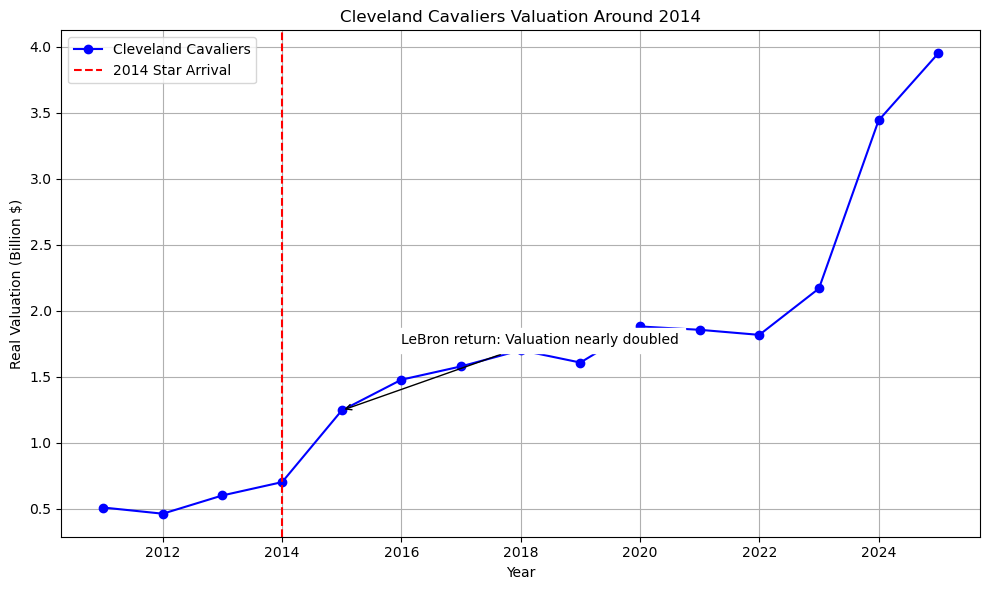

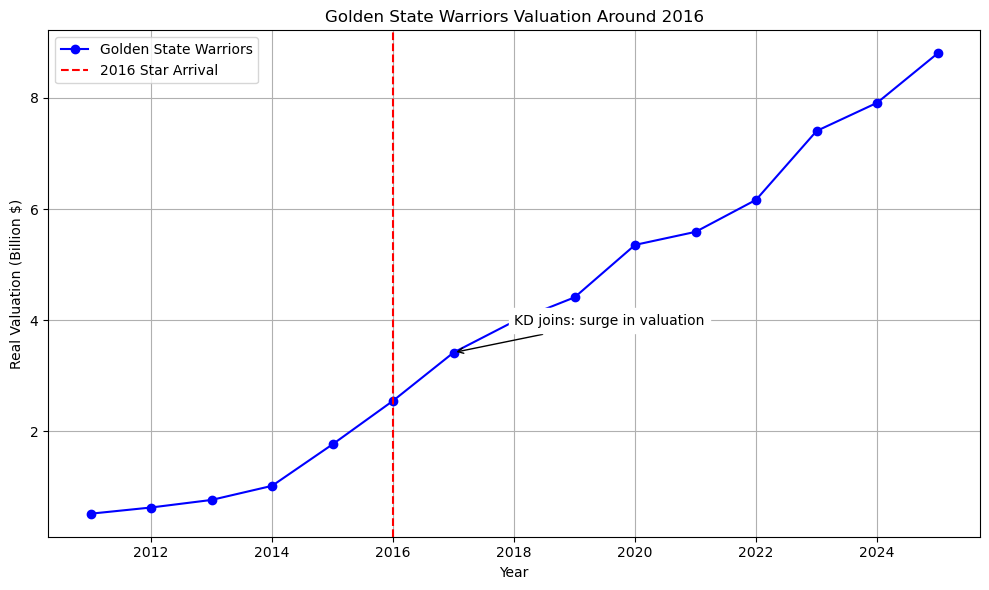

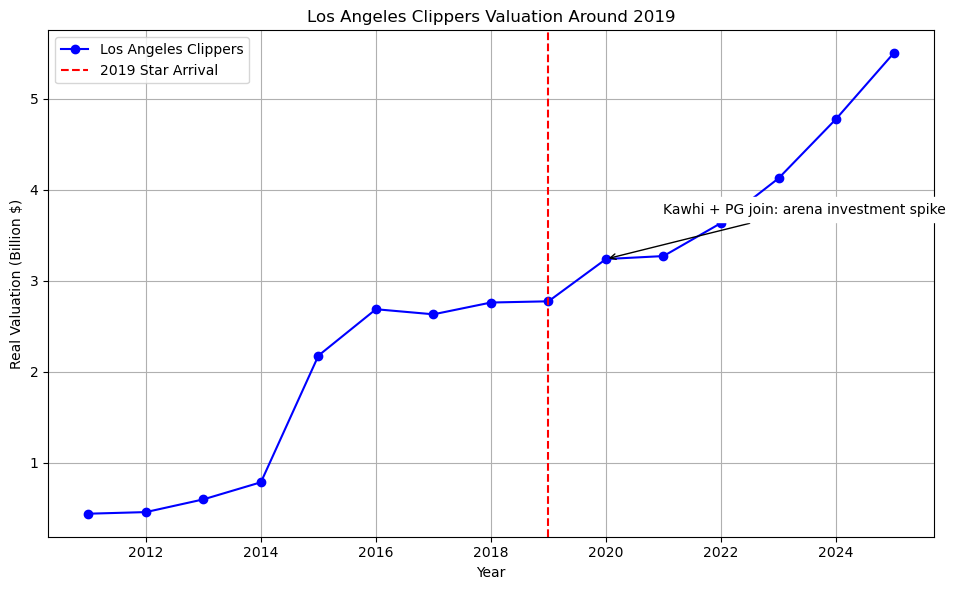

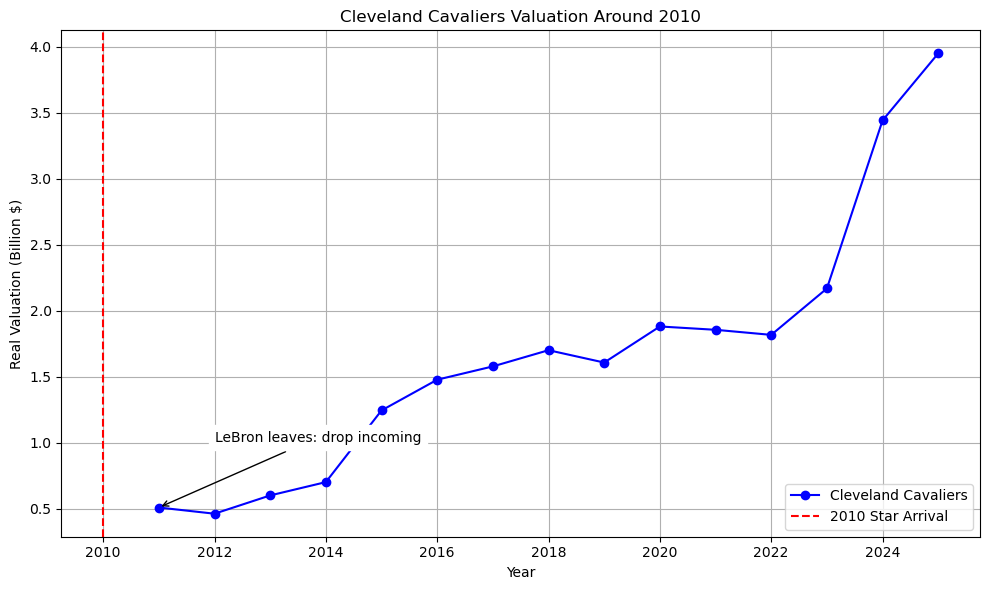

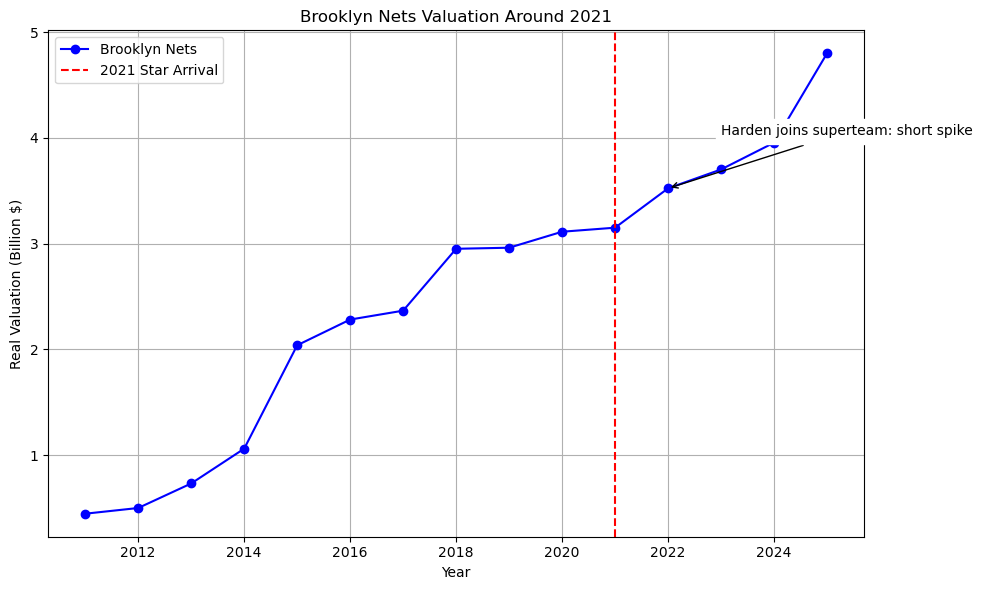

In [11]:
plot_single_team_with_annotate(df, 'Cleveland Cavaliers', 2014, 'LeBron return: Valuation nearly doubled')
plot_single_team_with_annotate(df, 'Golden State Warriors', 2016, 'KD joins: surge in valuation')
plot_single_team_with_annotate(df, 'Los Angeles Clippers', 2019, 'Kawhi + PG join: arena investment spike')
plot_single_team_with_annotate(df, 'Cleveland Cavaliers', 2010, 'LeBron leaves: drop incoming')
plot_single_team_with_annotate(df, 'Brooklyn Nets', 2021, 'Harden joins superteam: short spike')


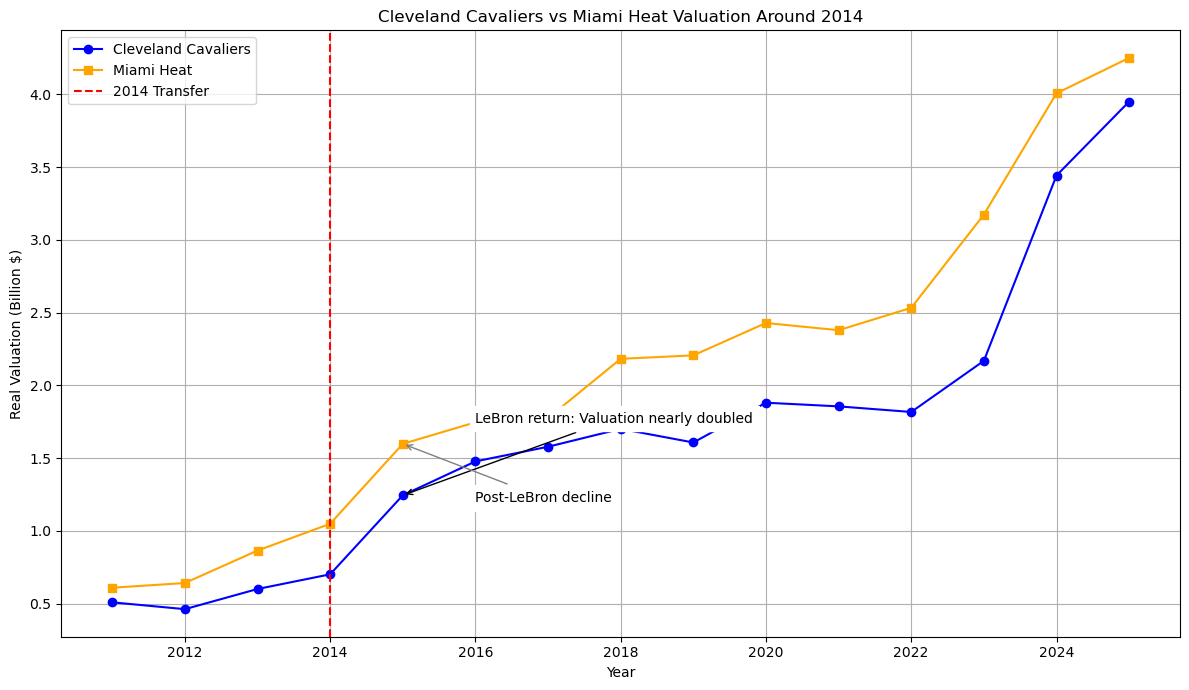

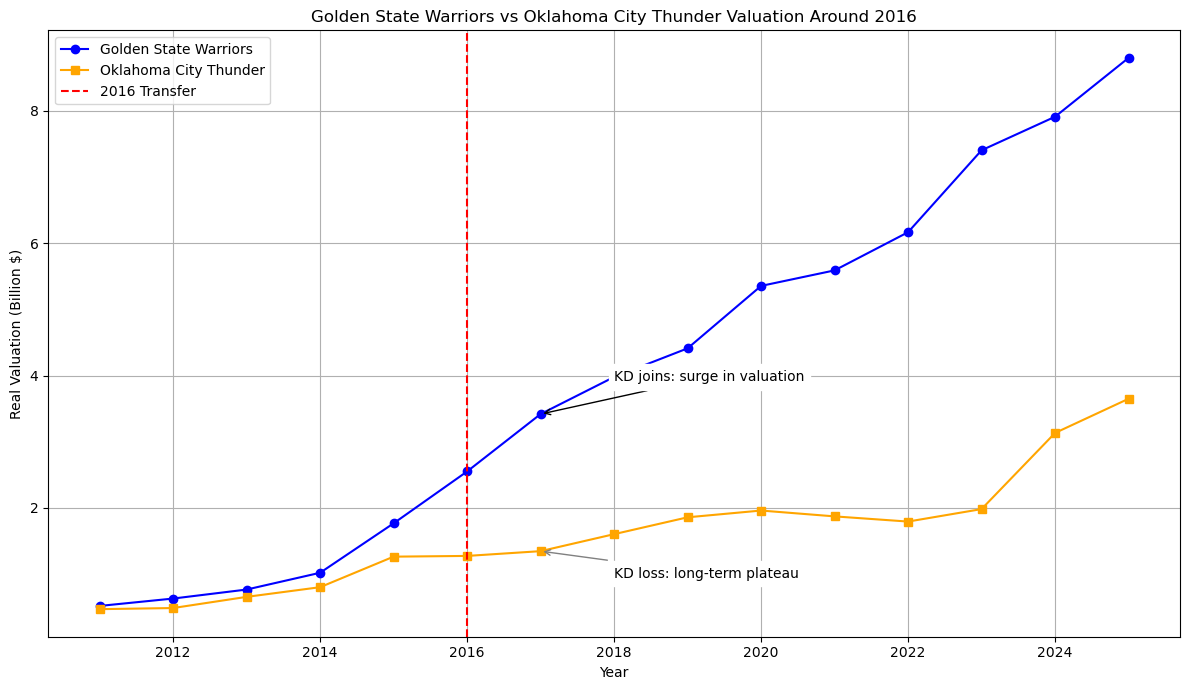

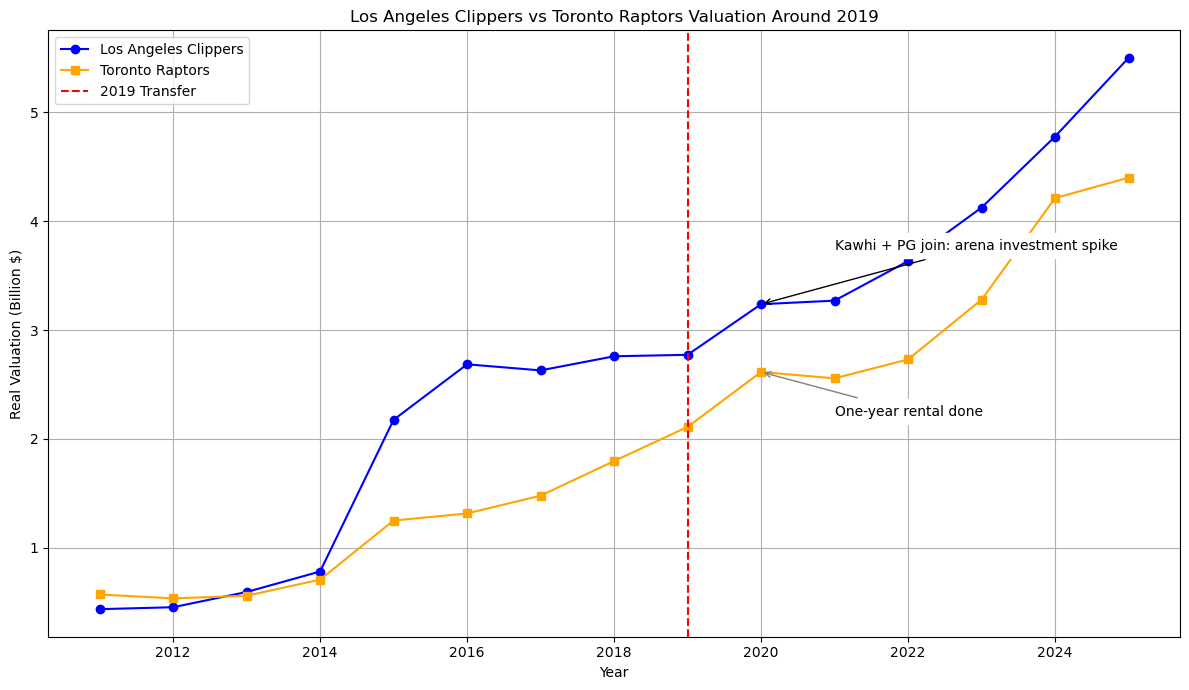

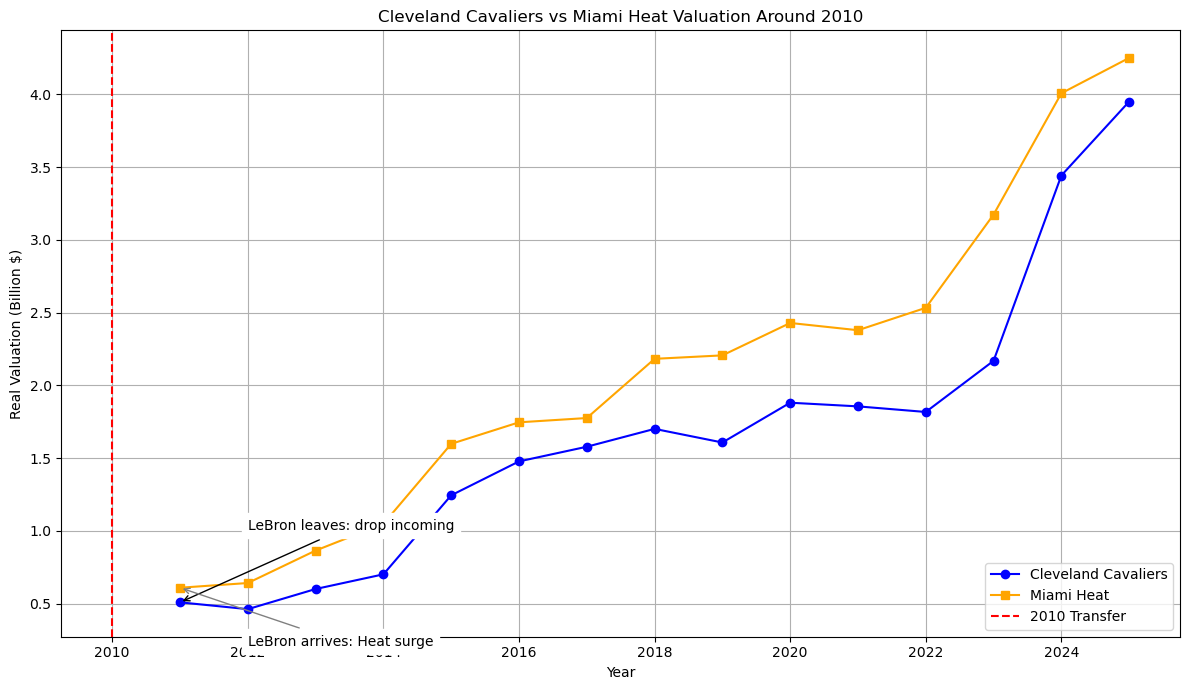

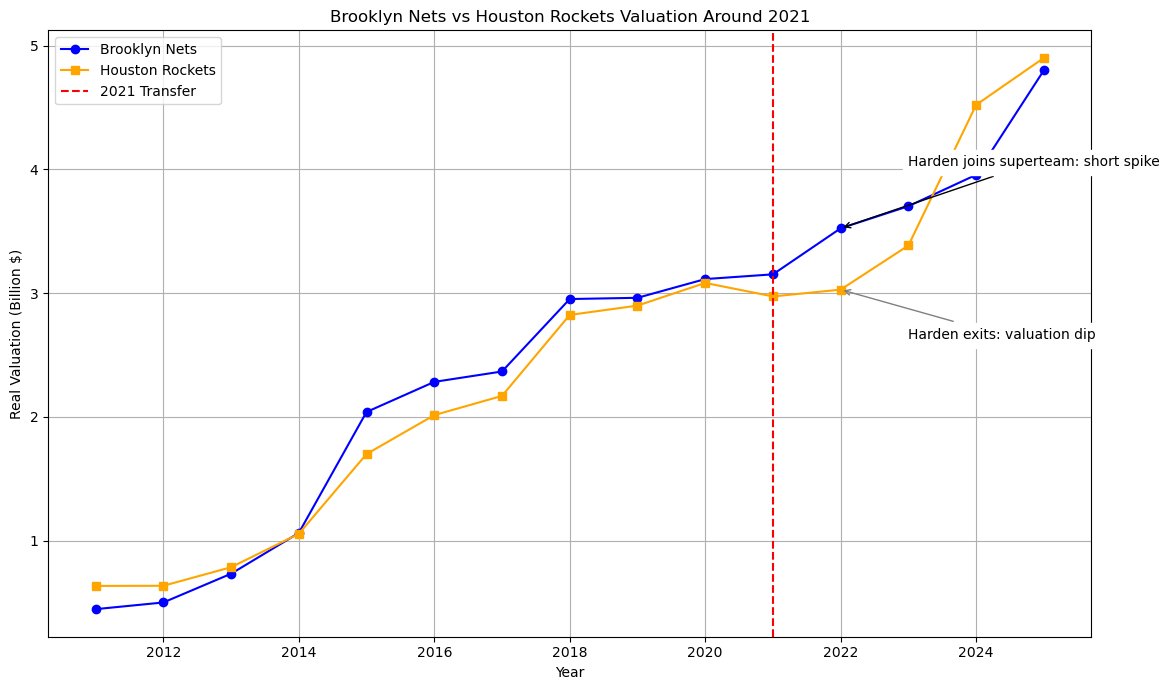

In [13]:
plot_two_teams_comparison(df, 'Cleveland Cavaliers', 'Miami Heat', 2014, 'LeBron return: Valuation nearly doubled', 'Post-LeBron decline')
plot_two_teams_comparison(df, 'Golden State Warriors', 'Oklahoma City Thunder', 2016, 'KD joins: surge in valuation', 'KD loss: long-term plateau')
plot_two_teams_comparison(df, 'Los Angeles Clippers', 'Toronto Raptors', 2019, 'Kawhi + PG join: arena investment spike', 'One-year rental done')
plot_two_teams_comparison(df, 'Cleveland Cavaliers', 'Miami Heat', 2010, 'LeBron leaves: drop incoming', 'LeBron arrives: Heat surge')
plot_two_teams_comparison(df, 'Brooklyn Nets', 'Houston Rockets', 2021, 'Harden joins superteam: short spike', 'Harden exits: valuation dip')
